Perspective Transformation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('images/giraffe.jpg')
# print(image)

(-0.5, 1299.5, 730.5, -0.5)

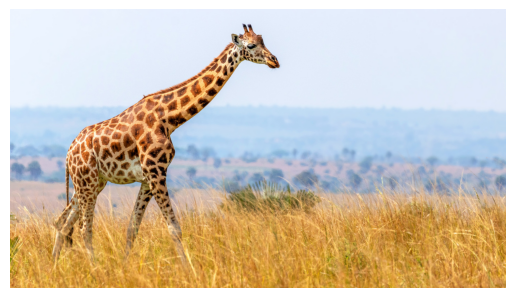

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')

In [5]:
rows, cols, channels = image_rgb.shape
print(f"rows: {rows}, cols: {cols}, channels: {channels}")


rows: 731, cols: 1300, channels: 3


In [9]:
input_points = np.float32([[50,50], [cols-50,50], [50,rows-50], [cols-50,rows-50]])
output_points = np.float32([[10,100], [cols-100,50], [100,rows-10], [cols-50,rows-100]])



'''
Transformation matrix for perspective transformation

a , b , c
d , e , f
g , h , 1
a, b, c, d, e, f, g, h are the parameters of the transformation matrix.

a, b, c is responsible for scaling, rotation, and translation in the x direction.
d, e, f is responsible for scaling, rotation, and translation in the y direction.
g, h is responsible for perspective transformation.
g and h handle the perspective component that account for depth and skew.

'''

M = cv2.getPerspectiveTransform(input_points, output_points)

print(M)

[[ 1.07137729e+00  1.48462570e-01 -5.09359354e+01]
 [-3.88105926e-02  1.02595174e+00  5.12035211e+01]
 [ 6.17929666e-05  5.03226808e-05  1.00000000e+00]]


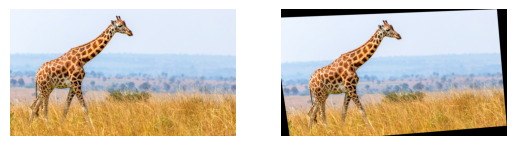

In [14]:
perspective_image = cv2.warpPerspective(image_rgb, M, (cols, rows))

plt.subplot(121)
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(122)
plt.imshow(perspective_image)
plt.axis('off')
plt.show()

Affine Transformation

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


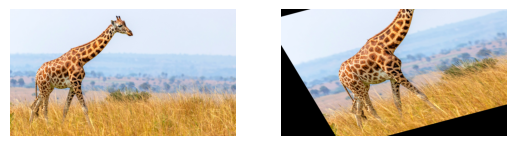

In [16]:
input_points = np.float32([[50,50], [200,50], [50,200]])
output_points = np.float32([[10,100], [200,50], [100,250]])

M = cv2.getAffineTransform(input_points, output_points)
print(M)
affine_image = cv2.warpAffine(image_rgb, M, (cols, rows))








plt.subplot(121)
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(122)
plt.imshow(affine_image)
plt.axis('off')
plt.show()

Rotation

[[  0.70710678   0.70710678 -67.7133829 ]
 [ -0.70710678   0.70710678 566.52543264]]


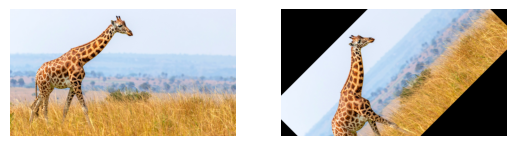

In [17]:
angle = 45
center = (cols // 2, rows // 2)
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)
print(M)

rotated_image = cv2.warpAffine(image_rgb, M, (cols, rows))
plt.subplot(121)
plt.imshow(image_rgb)
plt.axis('off')
plt.subplot(122)
plt.imshow(rotated_image)
plt.axis('off')
plt.show()